# Kaggle Machine Learning Particle Physics

The purpose of this notebook is me getting a handle on the data and doing some simple visualizations. Most of this notebook follows [jBonatt's notebook](https://www.kaggle.com/jbonatt/trackml-eda-etc).

As a personal challenge, I got tired of using pyplot and wanted to use plotly because of its interactivity.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import trackml

from trackml.dataset import load_event

import random


import plotly
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

import plotly.plotly as py
import plotly.graph_objs as go

import plotly.tools as tls
% matplotlib inline

print ('Complete')

Complete


## File Types

The four file types are:

    event000001000-<cells, hits, particles, truth>.csv
    
In my world, I have defined these as:

    <path/to/file>/prefix-tag.csv


## Getting Inside Each File Type

All of this information was taken from the [Kaggle data page](https://www.kaggle.com/c/trackml-particle-identification/data).

**Hits**
    
-  hit_id: numerical identifier of the hit inside the event.
-  x, y, z: measured x, y, z position (in millimeter) of the hit in global coordinates.
-  volume_id: numerical identifier of the detector group.
-  layer_id: numerical identifier of the detector layer inside the group.
-  module_id: numerical identifier of the detector module inside the layer.



**Cells**
-  hit_id: numerical identifier of the hit as defined in the hits file.
-  ch0, ch1: channel identifier/coordinates unique within one module.
-  value: signal value information, e.g. how much charge a particle has deposited.
    
    

**Particles**

-  particle_id: numerical identifier of the particle inside the event.
-  vx, vy, vz: initial position or vertex (in millimeters) in global coordinates.
-  px, py, pz: initial momentum (in GeV/c) along each global axis.
-  q: particle charge (as multiple of the absolute electron charge).
-  nhits: number of hits generated by this particle. 

___________

**Truth** (This is what we don't actually know)

-  hit_id: numerical identifier of the hit as defined in the hits file.
-  particle_id: numerical identifier of the generating particle as defined in the particles file. A value of 0 means that the hit did not originate from a reconstructible particle, but e.g. from detector noise.
-  tx, ty, tz: true intersection point in global coordinates (in millimeters) between the particle trajectory and the sensitive surface.
-  tpx, tpy, tpz: true particle momentum (in GeV/c) in the global coordinate system at the intersection point. The corresponding vector is tangent to the particle trajectory at the intersection point.
-  weight: per-hit weight used for the scoring metric; total sum of weights within one event equals to one.



In the next cell, we load and print the headers for each data file just to see what it looks like.

In [2]:
prefix = 'event000001000'
path = 'Input/train_100_events/'
dfHits, dfCells, dfParticles, dfTruth = load_event(path+prefix)

fileDict = {
    'Hits': dfHits,
    'Cells': dfCells,
    'Particles': dfParticles,
    'Truth': dfTruth
}

for file in fileDict:
    print ('File: {0} \n {1}'.format(file, fileDict[file].head()))
    print ()

print ('Complete')

File: Hits 
    hit_id          x         y       z  volume_id  layer_id  module_id
0       1 -64.409897 -7.163700 -1502.5          7         2          1
1       2 -55.336102  0.635342 -1502.5          7         2          1
2       3 -83.830498 -1.143010 -1502.5          7         2          1
3       4 -96.109100 -8.241030 -1502.5          7         2          1
4       5 -62.673599 -9.371200 -1502.5          7         2          1

File: Cells 
    hit_id  ch0  ch1     value
0       1  209  617  0.013832
1       1  210  617  0.079887
2       1  209  618  0.211723
3       2   68  446  0.334087
4       3   58  954  0.034005

File: Particles 
         particle_id        vx        vy        vz         px         py  \
0  4503668346847232 -0.009288  0.009861 -0.077879  -0.055269   0.323272   
1  4503737066323968 -0.009288  0.009861 -0.077879  -0.948125   0.470892   
2  4503805785800704 -0.009288  0.009861 -0.077879  -0.886484   0.105749   
3  4503874505277440 -0.009288  0.009861 -0.0778

## Plotting Hits

Lets plot the positions of some hits in the `hits` file.


### 3D Scatter
From this plot, we can see that the beamline is the $z$ axis. Colors correspond to different locations along the $Z$ axis.

In [5]:

# depth is the number of particle to plot
depth = 4000
dfHitsSample = dfHits.sample(depth)

trace = go.Scatter3d(
    x=dfHitsSample.y,
    y=dfHitsSample.z,
    z=dfHitsSample.x,
    mode = 'markers',
    marker=dict(
        size=2,
        color = dfHitsSample.z,
        colorscale='Viridis'
    )
)

layout = go.Layout(
    title = "{0} Hits".format(depth),
    scene = dict(
        xaxis = dict(title = 'Y Location [mm]'),
        yaxis = dict(title = 'Z Location [mm]'),
        zaxis = dict(title = 'X Location [mm]'),
    )
)

data = [trace]
fig = go.Figure(data=data, layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')


print ('Complete')

Complete


### XY Slice

In this cell, we plot `depth` randomly selected points and project them onto the XY plane, just to get an idea about the radial distribution of hits. It is useful to zoom into the dense region at the center because there is some substructure we can't see at a large scale.

In [4]:
depth = 10000
dfHitsSample = dfHits.sample(depth)

trace = go.Scatter(
    x = dfHitsSample.x,
    y = dfHitsSample.y,
    mode = 'markers',
    marker=dict(
        size=2
    )
)

layout = go.Layout(
    width = 700,
    height = 700,
    title = 'XY Projection'
)

data = [trace]
fig = go.Figure(data=data, layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')


### XZ Projection

In this cell, we plot `depth` randomly sampled hits and project them onto the XZ plane. This plot shows a cutaway view (peripindicular to the beamline) of the detector positions.

In [41]:
depth = 8000
dfHitsSample = dfHits.sample(depth)

trace = go.Scatter(
    x = dfHitsSample.z,
    y = dfHitsSample.y,
    mode = 'markers',
    marker=dict(
        size=2
    )
)

layout = go.Layout(
    width = 850,
    height = 600,
    title = 'XY Projection',
    xaxis = dict(title= 'Z Axis [mm]'),
    yaxis = dict(title= 'Y Axis [mm]'
                )
)


data = [trace]
fig = go.Figure(data=data, layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')

## Detector Volumes, Layers, and Modules

Now that we have some sort of idea about the spatial distribution of hits, lets begin to figure out what the detector "volume", "layer", and "module" mean.

It is useful to keep [this picture](https://www.kaggle.com/c/trackml-particle-identification/data)

![Note](Detector.png)


The horizontal axis is the beam line and the vertical axis is polar distance in the XY plane. This view shows a cutaway if we were to look at the detector perpendicular to the beamline. The thick colored lines are detectors. Detectors paralell to the beam line are wrapped around the beamline like an onion. Detectors perpindicular to the beamline are like a slab with a tiny hole in the middle for the beam.

I assume the different colors correspond to something meaningful but I do not know what. The larger numbers in each colored region are detector volumes, the smaller numbers are detector layers within that volume. I assume modules lie within each layer, but they are not pictured here.




### Detector Volumes

Lets plot hits and coordinate the colors for detector volumes. 

In [5]:
volumes = np.asarray(dfHits.volume_id.unique())

dataDict = dict.fromkeys(volumes)

depth = 5000
dfHitsSample = dfHits.sample(depth)

for volume in volumes:
    d = dfHitsSample.loc[ dfHits['volume_id'] == volume ]

    trace = go.Scatter3d(
    x = d.z,
    y = d.x,
    z = d.y,
    mode = 'markers',
    marker=dict(
        size=2,
    ),
    name = 'Volume: {0}'.format(volume)
)

    dataDict[volume] = (trace)
    
    
layout = go.Layout(
    title = 'Detector Volumes',
    scene = dict(
        xaxis = dict(title = 'Z Axis [mm]'),
        yaxis = dict(title = 'X Axis [mm]'),
        zaxis = dict(title = 'Y Axis [mm]')
        )
)

    
bigData = []
for key in sorted(dataDict):
    bigData.append(dataDict[key])
fig = go.Figure(data=bigData, layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')



## Detector Layers

Lets play the same game as before and plot hits for each detector layer

In [6]:
# volume = 7,8,9,12,13,14,16,17,18
volume = 13

depth = 5000
dfHitsSample = dfHits.sample(depth)

layers = np.asarray(dfHitsSample.layer_id.unique())
layerDict = dict.fromkeys(layers)

d = dfHitsSample.loc[ dfHitsSample['volume_id'] == volume ]

for layer in layers:
    d1 = d.loc[ d['layer_id'] == layer]

    trace = go.Scatter3d(
    x = d1.z,
    y = d1.x,
    z = d1.y,
    mode = 'markers',
    marker=dict(
        size=2,
    ),
    name = 'layer: {0}'.format(layer)
)

    layerDict[layer] = (trace)

        
layout = go.Layout(
    title = 'Volume {} Layers'.format(volume),
    scene = dict(
        xaxis = dict(title = 'Z Axis [mm]'),
        yaxis = dict(title = 'X Axis [mm]'),
        zaxis = dict(title = 'Y Axis [mm]')
        )
)
        
bigData = []
    
for layer in sorted(layerDict):
    bigData.append(layerDict[layer])
fig = go.Figure(data=bigData, layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')



## Module Stuff

We play the exact same game again for Modules.

In [93]:
# Define Volume and Layer
volume = 13
layer =  6

# Skim down the file to what we want, the module information
depth = 200
dfHitsSample = dfHits.loc[dfHits['volume_id'] == volume]
dfHitsSample = dfHitsSample.loc[ dfHitsSample['layer_id'] == layer]
dfHitsSample = dfHitsSample.sample(depth)

# Identify Modules
modules = np.asarray(dfHits.module_id.unique())
moduleDict = dict.fromkeys(modules)

# Loop over modules and plot xyz for each module id
for module in modules:
    d = dfHitsSample.loc[ dfHits['module_id'] == module ]

    trace = go.Scatter3d(
    x = d.z,
    y = d.x,
    z = d.y,
    mode = 'markers',
    marker=dict(
        size=3,
    ),
    name = 'module: {0}'.format(module)
)
    
    moduleDict[module] = (trace)
    
layout = go.Layout(
title = 'Volume {0} Layer {1} Modules'.format(volume,layer)
)
    
    
bigData = []
for key in sorted(moduleDict):
    bigData.append(moduleDict[key])
fig = go.Figure(data=bigData, layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')



Okay tha's alot. Basically, volumes contain layers which contain modules. Modules are (I think) the smallest resolution of something we can see with the detector.

## Histograms

Now that we have an idea of the spatial distribution of the detector, lets plot some histograms of the volumes, layers, modules, and whatever cells are. Maybe we can say something intelligent about the id numbers and the number of hits.

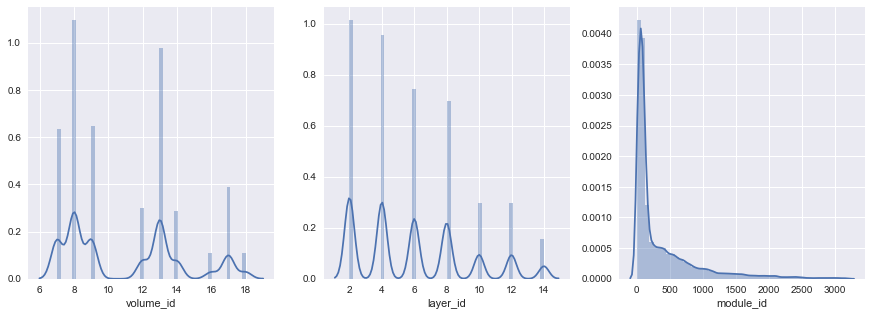

In [98]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.distplot(dfHits.volume_id)
plt.subplot(1,3,2)
sns.distplot(dfHits.layer_id)
plt.subplot(1,3,3)
sns.distplot(dfHits.module_id)
plt.show()

From this we can conclude the following:
  - Volume: Particles are more likely to pass through the middle of the detector (the concentric soda can columes) as opposed to the flat sheet detectors.
  - Layers: With the exception of volumes 7, 12, and 16, layers with a smaller numerical identifier get more hits. This seems strange to me why they would label them like this
  - Modules: As the module identifier number increases, we let less hits. Modules with identifier $< 250$ probably circumscribe the collision point.
    
It seems strange to me why layers are numbered in this convention. It seems to make more sense if the numbering began with the layer closest to the colission point.

## Seaborn Pariplot

There is much to unpack here, but I wanted to plot this more out of curiosity than anything else.

The Row and column labels go:
  1. x
  2. y
  3. z
  4. volume_id
  5. layer_id
  6.module_id

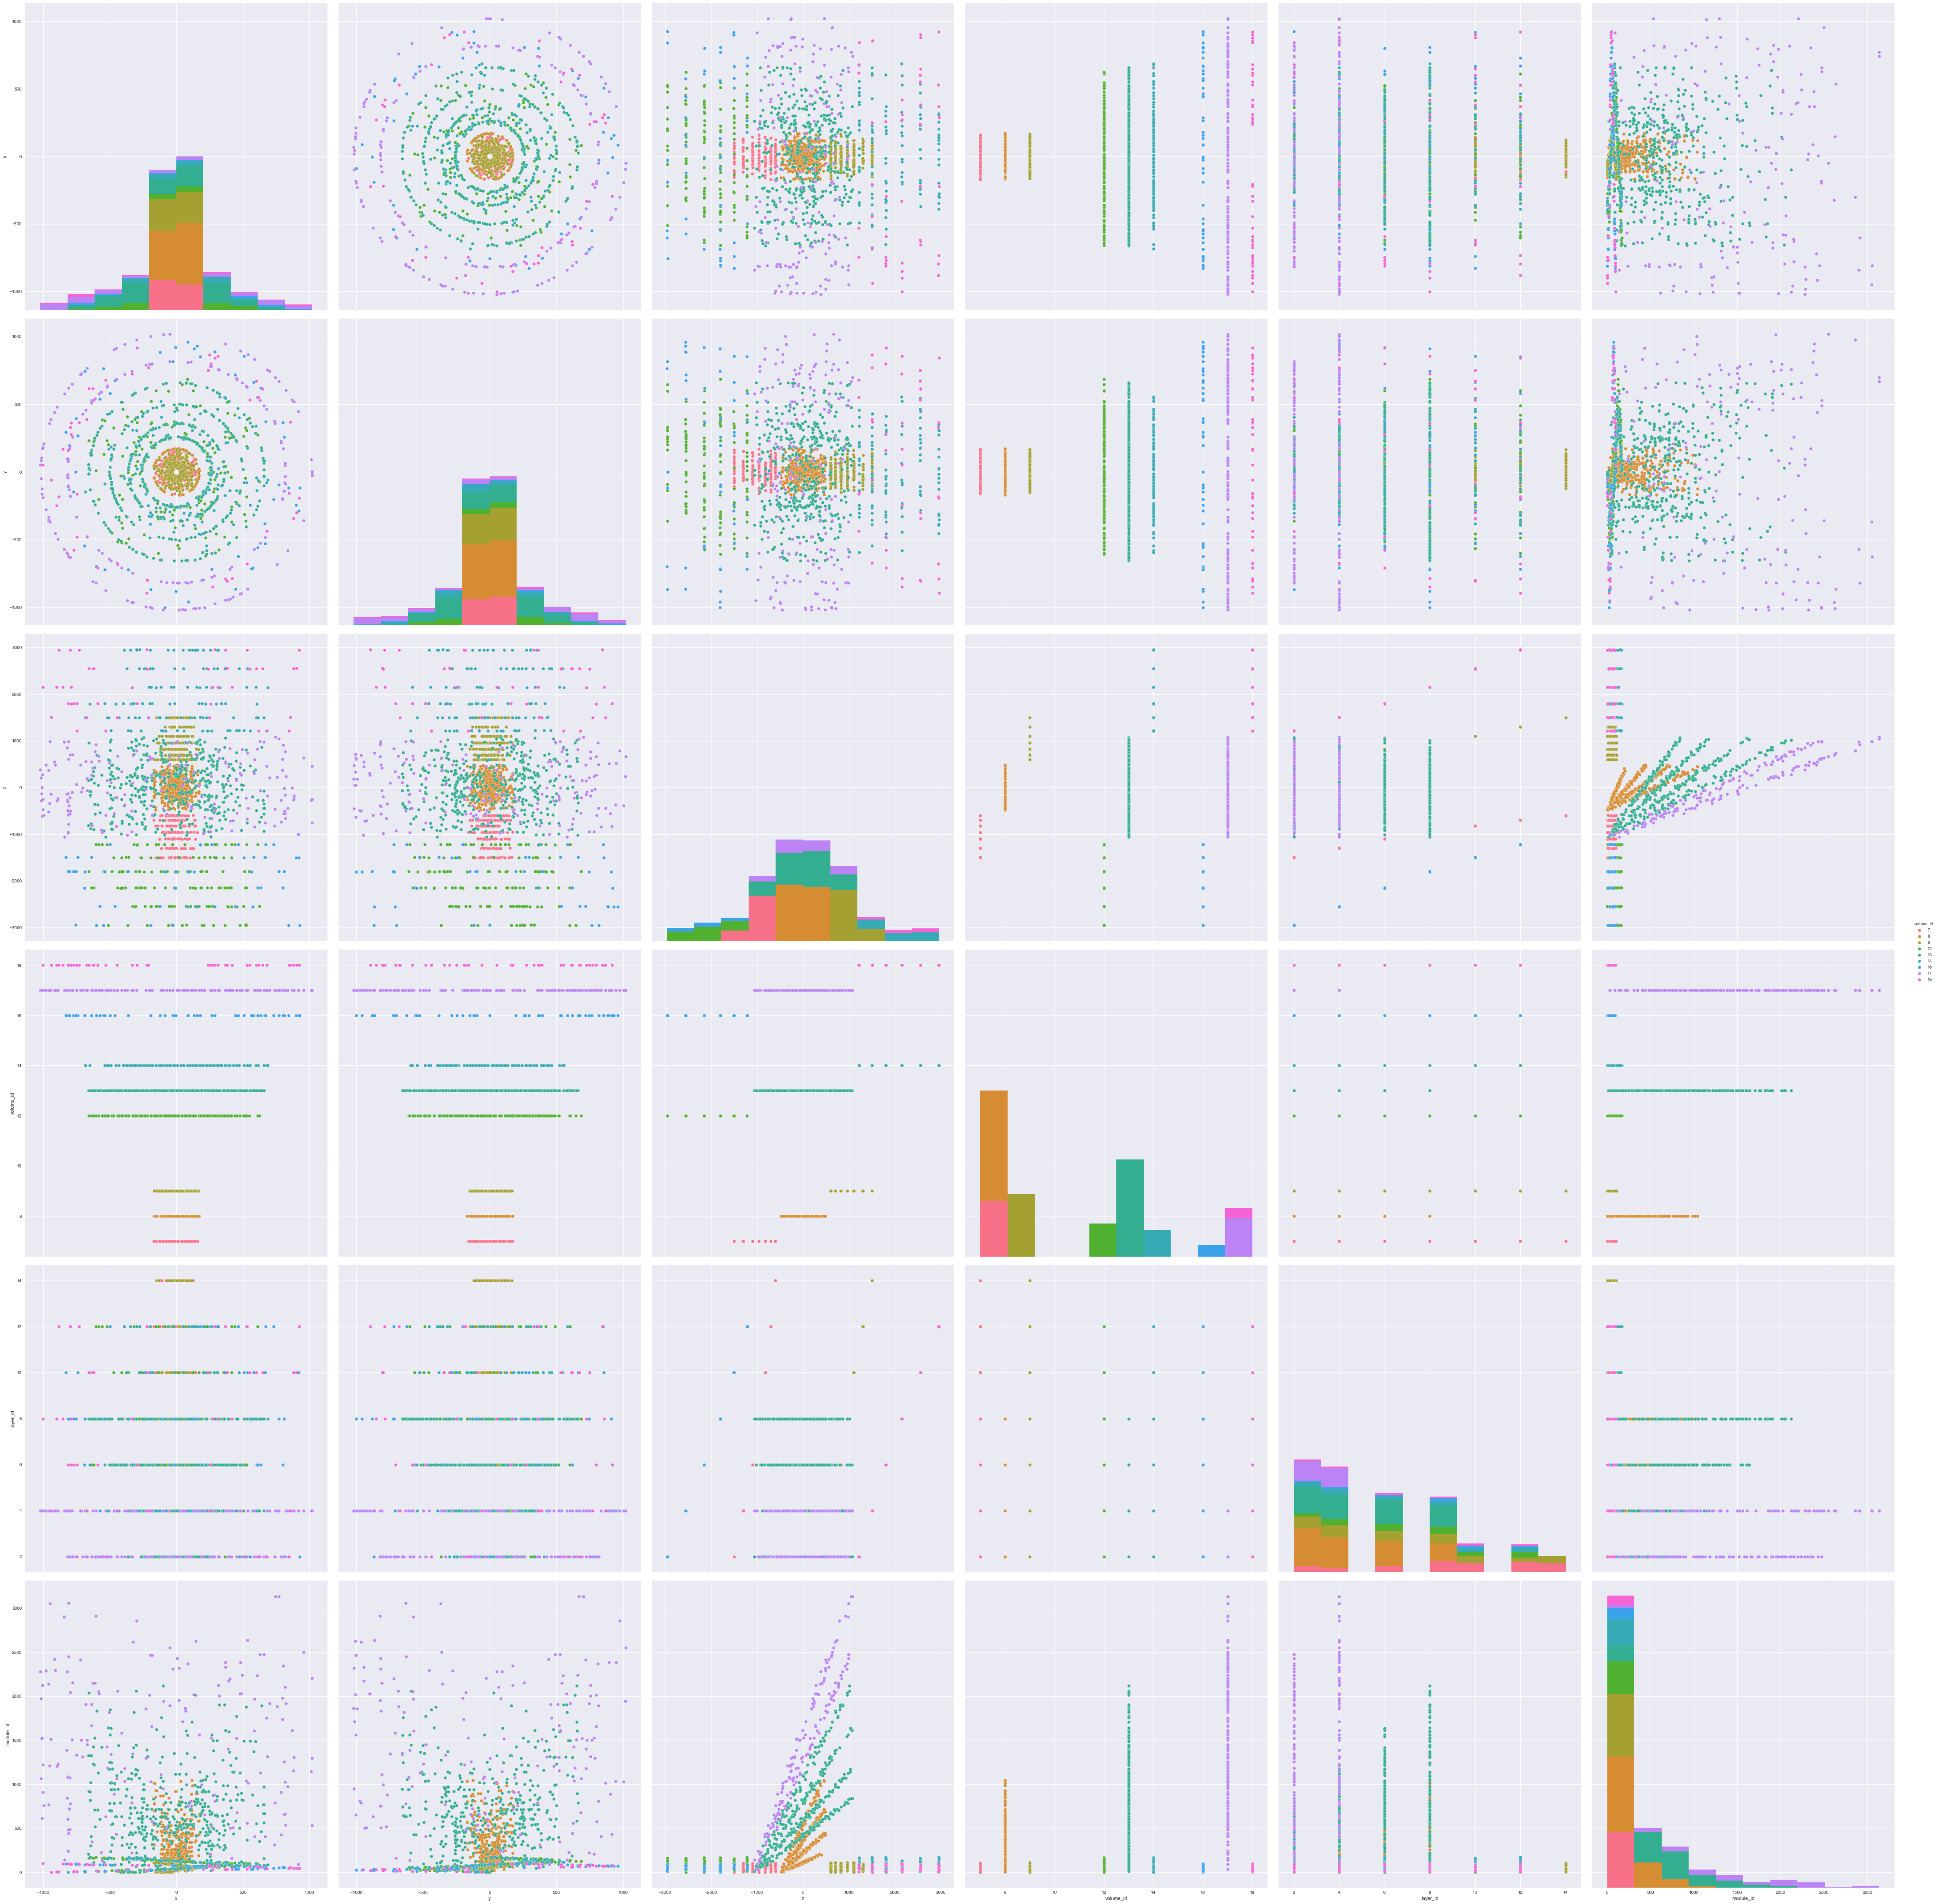

In [99]:
depth = 2000
sample = dfHits.drop('hit_id', axis = 1).sample(depth)
sns.pairplot(sample, hue='volume_id',size = 10)
plt.show()

## Pairplot Heatmap

We make the same plot as a heatmap to more easily see any correlations.

Dark blue is a strong correlation and red is a negative correlation.

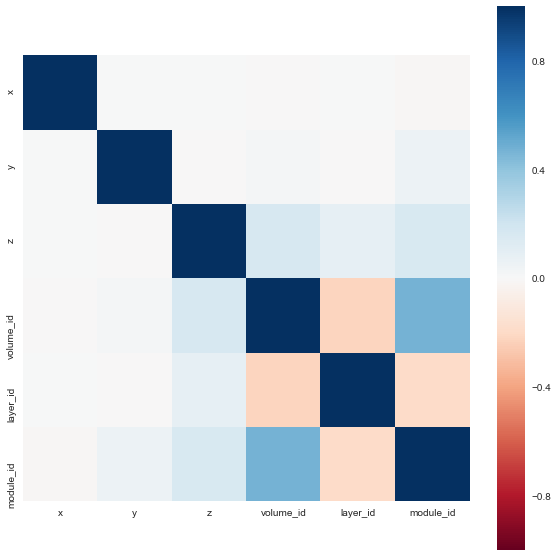

In [100]:
plt.figure(figsize = (10,10))

data = dfHits.drop('hit_id', axis = 1).corr()

sns.heatmap(data, cmap = 'RdBu', square = True)
plt.show()

## Radius

As another sanity check, lets plot the number of hits in each volume, layer, module as a function of radius.

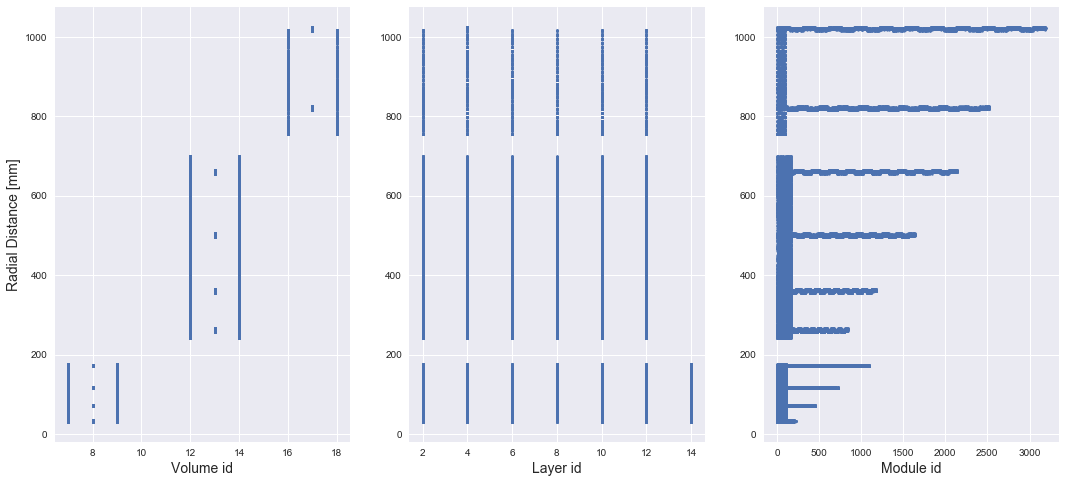

In [101]:
plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (18,8))

radialDistance2 = np.sqrt((dfHits.x)**2 + (dfHits.y)**2)

plt.subplot(1,3,1)
plt.scatter(dfHits.volume_id, radialDistance2, s = 4)
plt.xlabel('Volume id',fontsize = 14)
plt.ylabel('Radial Distance [mm]',fontsize = 14)

plt.subplot(1,3,2)
plt.scatter(dfHits.layer_id, radialDistance2, s=4)
plt.xlabel('Layer id',fontsize = 14)
# plt.ylabel('Radial Distance [mm]',fontsize = 14)

plt.subplot(1,3,3)
plt.scatter(dfHits.module_id, radialDistance2, s = 4)
plt.xlabel('Module id',fontsize = 14)
# plt.ylabel('Radial Distance [mm]',fontsize = 14)

plt.show()

For the volumes, it makes sense why the middle ones (8, 13, and 17) are discrete because they are the concentric soda-can detectors. The exterior volumes are perpindicular to the beamline, and are thus continuous in the radial direction.

## Particle Tracks

I got impatient and decided to figure out how to plot tracks.

Inside of the Truth file, the `particle_id` labels individual particles.

We can choose a specific particle id and plot all of its corresponding positions.

In [3]:
nTracks = 75

# Grab unique particle ID's
allTracks = dfTruth.particle_id.unique()

# Grab a random sample of "nTracks" particles
tracks = []
for i in range(nTracks):
    index = int(np.floor(random.random()*len(allTracks)))
    tracks.append(allTracks[index])


# Make dictionary from these particles
# This will store the track for each particle
dataDict = dict.fromkeys(tracks)
dfTruthSample = dfTruth

# Append the hits for each particle
for track in tracks:
    d = dfTruthSample[ dfTruthSample.particle_id == track ]
    
    trace = go.Scatter3d(
    x = d.ty,
    y = d.tz,
    z = d.tx,
    mode = 'lines'
)
    
    dataDict[track] = (trace)

# Plot the tracks
bigData = []
for key in dataDict:
    bigData.append(dataDict[key])
fig = go.Figure(data=bigData)
offline.iplot(fig, filename='simple-3d-scatter')


## Individual Tracks

The following idea (and code) was taken from [Maka's Notebook](https://www.kaggle.com/makahana/quick-trajectory-plot/code)

This method takes in a row number and outputs the track for the associated particle for that row in the particles file.

Sometimes, a particle will be listed in the `particles` file but not in the `truth` file. When this happens, there is no graph to output. For a demonstration, try `row = 2`.

In [29]:
# print ('Particles: \n',dfParticles.head())
# print ('Truth: \n',dfTruth.head())
# print ('----------')
# print ()

dfP = dfParticles
dfT = dfTruth


# Row Index to be looped over
row1 = 5221


# Particle ID from that row index
# Turns index -> particle number
part_id1 = dfP.loc[row1,'particle_id']
# part_id2 = dfP.loc[row2,'particle_id']

assert (part_id1 != 0), 'Hit due to noise, no associated track'
# assert (part_id2 != 0), 'Hit due to noise, no associated track'

all_part_ids_part = dfP.particle_id.unique()
all_part_ids_truth = dfT.particle_id.unique()


# Data Frame Specific to particle in "row"
# DF populated with values from "Truth"
pdf1 = dfT.loc[ dfT.particle_id == part_id1 ]
# pdf2 = dfT.loc[ dfT.particle_id == part_id2 ]



# Grab unique hit_ids of particles
hit_ids1 = np.asarray(pdf.hit_id)
xloc1 = np.asarray(pdf1.tx)
yloc1 = np.asarray(pdf1.ty)
zloc1 = np.asarray(pdf1.tz)

# hit_ids2 = np.asarray(pdf2.hit_id)
# xloc2 = np.asarray(pdf2.tx)
# yloc2 = np.asarray(pdf2.ty)
# zloc2 = np.asarray(pdf2.tz)

##############################
# Plot the particle trajectory
##############################
trace1 = go.Scatter3d(
    x = xloc1,
    y = yloc1,
    z = zloc1,
    mode = 'lines',
    name = 'Trajectory',
    marker=dict(color = 'blue'),
)

# Mark the starting point
trace2 = go.Scatter3d(
#     x = dfP.loc[ dfP.particle_id == part_id1].vx,
#     y = dfP.loc[ dfP.particle_id == part_id1].vy,
#     z = dfP.loc[ dfP.particle_id == part_id1].vz,
    x=xloc1[0:1],
    y=yloc1[0:1],
    z=zloc1[0:1],
    mode = 'markers',
    name = 'Start',
    marker = dict(size = 6, color = 'red'),
)

# trace3 = go.Scatter3d(
#     x = xloc2,
#     y = yloc2,
#     z = zloc2,
#     mode = 'lines',
#     name = 'Trajectory',
#     marker=dict(color = 'purple'),
# )

# trace4 = go.Scatter3d(
#     x = dfP.loc[ dfP.particle_id == part_id2].vx,
#     y = dfP.loc[ dfP.particle_id == part_id2].vy,
#     z = dfP.loc[ dfP.particle_id == part_id2].vz,
#     mode = 'markers',
#     name = 'Start',
#     marker = dict(size = 6,color = 'orange'),
# )


layout = go.Layout(
    title = 'Partile {0}, {1} Trajectory'.format(part_id1,part_id2),
    scene = dict(
        xaxis = dict(title = 'X Location [mm]'),
        yaxis = dict(title = 'Y Location [mm]'),
        zaxis = dict(title = 'Z Location [mm]'),
    )
)

fig = go.Figure(data=[trace1,trace2], layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')


print ('Complete')

Complete


5/22/18 **clustering algorithms**, K-means, PCA

Neural network to identify features

Hidden Markov, probability table

# 6/05/18

The goal of this section is to see whether or not the lines actually corresponds to hits, or just the "best guess."

### Goal:
1. Plot a track
 
2. Plot nearby points


Note: 

    row = 10654 is a good curvy track`
    row = 1 is mostly straignt
    row = 12 has turns around
    row = 512 turns around twice
    row = 5221 looks like a perfect straignt line, *use this one for now*

    rows 20 & 21 are nearby
    

### Find Nearby Points

Given a point in the detector, `find_nearby(x,y,z)` locates nearby points by looking inside a search distance for z, y, and x individually in that order.


In [91]:

###########################################
def find_nearby(df,x,y,z):
    '''
    find_nearby(df,x,y,z):
    
    Input: Hits Dataframe (df), Cartesian coordinates x,y,z in mm
    Return: Dataframe of points within the specified z and xy search distances
    '''
    zLook = 5 # mm
    xyLook = 10 #mm

    # Trim according to z value
    zDistance = np.abs(df.z-z)
    zTrimDF = dfH.loc[ zDistance < zLook]

    # trim according to y value
    yDistance = np.abs(zTrimDF.y-y)
    yTrimDF = zTrimDF.loc[ yDistance < xyLook ]

    # trim according to x value
    xDistance = np.abs(yTrimDF.x-x)
    xTrimDF = yTrimDF.loc[ xDistance < xyLook]

    return (xTrimDF)

print ('Complete')

Complete


In [31]:
dfT = dfTruth
dfH = dfHits
dfP = dfParticles

# Pick out an actual track
row = 5221
part_id = dfP.loc[row,'particle_id']
# print (part_id)

xActual = np.asarray( dfT.loc[ dfT.particle_id == part_id].tx)
yActual = np.asarray( dfT.loc[ dfT.particle_id == part_id].ty)
zActual = np.asarray( dfT.loc[ dfT.particle_id == part_id].tz)

# Given hit from truth file
xTest = xActual[3]
yTest = yActual[3]
zTest = zActual[3]

print (xTest,yTest,zTest)
print (find_nearby(dfHits,xTest,yTest,zTest))

34.7986 -19.1968 957.5
       hit_id          x          y      z  volume_id  layer_id  module_id
56083   56084  34.850300 -20.329201  957.5          9         8         42
56094   56095  35.236099 -22.302601  957.5          9         8         42
56097   56098  31.277399 -22.866800  957.5          9         8         42
56103   56104  30.197599 -18.328100  957.5          9         8         42
56109   56110  34.803501 -19.171400  957.5          9         8         42
56110   56111  30.117901 -22.665501  957.5          9         8         42
56115   56116  35.643200 -22.518801  957.5          9         8         42
56211   56212  39.373699 -18.933901  958.0          9         8         47
56215   56216  35.253502 -22.314501  958.0          9         8         47
56217   56218  33.596298 -15.458500  958.0          9         8         47
56218   56219  36.006599 -14.616800  958.0          9         8         47
56219   56220  39.113602 -15.200200  958.0          9         8         47
56

This cell plots the nearby points for a given track but not the given track

In [32]:
dfP = dfParticles
dfT = dfTruth
dfH = dfHits

# Row Index to be looped over
row = 5221
# Particle ID from that row index
# Turns index -> particle number
part_id = dfP.loc[row,'particle_id']

assert (part_id != 0), 'Hit due to noise, no associated track'

all_part_ids_part = dfP.particle_id.unique()
all_part_ids_truth = dfT.particle_id.unique()


# If the particle id isn't inside the truth file, skip it
# if (not np.isin(part_id,all_part_ids_truth)):
#     print ('Particle {0} not inside truth file'.format(part_id))
#     print ('---------------')
#     continue

pdf = dfT.loc[ dfT.particle_id == part_id ]

# Grab unique hit_ids and momenta of particle
hit_ids = np.asarray(pdf.hit_id)
xActual = np.asarray(pdf.tx)
yActual = np.asarray(pdf.ty)
zActual = np.asarray(pdf.tz)

print ('Particle ID: {0}'.format(part_id))
print ('Number of Hits: {0}'.format(len(xActual)))

nearbyDict = dict.fromkeys(range(len(xActual)))

for key in nearbyDict:
    x,y,z = xActual[key], yActual[key], zActual[key]
    
    nearbyDF = find_nearby(dfHits,x,y,z)
    
    trace = go.Scatter3d(
        x = nearbyDF.x,
        y = nearbyDF.y,
        z = nearbyDF.z,
        mode = 'markers',
        marker = dict(
        size = 2,
        color = 'orange'),
    )
    nearbyDict[key] = (trace)
    
bigData = []
for key in nearbyDict:
    bigData.append(nearbyDict[key])
fig = go.Figure(data=bigData)
offline.iplot(fig, filename='simple-3d-scatter')


Particle ID: 369299017735077888
Number of Hits: 12


## Plot Track and Nearby Points

In [71]:
dfP = dfParticles
dfT = dfTruth
dfH = dfHits

# Row Index to be looped over
row = 5221
# Particle ID from that row index
# Turns index -> particle number
part_id = dfP.loc[row,'particle_id']

assert (part_id != 0), 'Hit due to noise, no associated track'

pdf = dfT.loc[ dfT.particle_id == part_id ]

# Grab unique hit_ids and momenta of particle
hit_ids = np.asarray(pdf.hit_id)
xActual = np.asarray(pdf.tx)
yActual = np.asarray(pdf.ty)
zActual = np.asarray(pdf.tz)

print ('Particle ID: {0}'.format(part_id))
print ('Number of Hits: {0}'.format(len(xActual)))


    

##############################
# Plot the particle trajectory
##############################
trace1 = go.Scatter3d(
    x = xActual,
    y = yActual,
    z = zActual,
    mode = 'lines+markers',
    name = 'Trajectory',
    marker=dict(size=4,
               color = 'blue'),
)

# Mark the starting point
trace2 = go.Scatter3d(
    x = xActual[0:1],
    y = yActual[0:1],
    z = zActual[0:1],
    mode = 'markers',
    name = 'Start',
    marker = dict(
        size = 6,
        color = 'red'),
)



##############################
# Extract Nearby Points
##############################
nearbyDict = dict.fromkeys(range(len(xActual)))

for key in nearbyDict:
    x,y,z = xActual[key], yActual[key], zActual[key]
    
    nearbyDF = find_nearby(dfHits,x,y,z)
    
    trace = go.Scatter3d(
        x = nearbyDF.x,
        y = nearbyDF.y,
        z = nearbyDF.z,
        mode = 'markers',
        marker = dict(
        size = 3,
        color = 'orange'),
    )
    nearbyDict[key] = (trace)
    
    
    
layout = go.Layout(
    title = 'Particle {0} Trajectory'.format(part_id),
    scene = dict(
        xaxis = dict(title = 'X Location [mm]'),
        yaxis = dict(title = 'Y Location [mm]'),
        zaxis = dict(title = 'Z Location [mm]'),
    )
)
    
bigData = []
bigData.append(trace1)
bigData.append(trace2)
for key in nearbyDict:
    bigData.append(nearbyDict[key])
print (type(bigData[0]))
# fig = go.Figure(data=bigData, layout = layout)
# offline.iplot(fig, filename='simple-3d-scatter')


Particle ID: 369299017735077888
Number of Hits: 12
<class 'plotly.graph_objs.graph_objs.Scatter3d'>


## Plotting Helper Function

In [92]:
def make_plot(row):
    part_id = dfP.loc[row,'particle_id']

    assert (part_id != 0), 'Hit due to noise, no associated track'

    pdf = dfT.loc[ dfT.particle_id == part_id ]

    # Grab unique hit_ids and momenta of particle
    hit_ids = np.asarray(pdf.hit_id)
    xActual = np.asarray(pdf.tx)
    yActual = np.asarray(pdf.ty)
    zActual = np.asarray(pdf.tz)

#     print ('Particle ID: {0}'.format(part_id))
#     print ('Number of Hits: {0}'.format(len(xActual)))


    ##############################
    # Plot the particle trajectory
    ##############################
    trace1 = go.Scatter3d(
        x = xActual,
        y = yActual,
        z = zActual,
        mode = 'lines+markers',
        name = 'Trajectory',
        marker=dict(size=4,
                   color = 'blue'),
    )

    # Mark the starting point
    trace2 = go.Scatter3d(
        x = xActual[0:1],
        y = yActual[0:1],
        z = zActual[0:1],
        mode = 'markers',
        name = 'Start',
        marker = dict(
            size = 6,
            color = 'red'),
    )

    ##############################
    # Extract Nearby Points
    ##############################
    nearbyDict = dict.fromkeys(range(len(xActual)))

    for key in nearbyDict:
        x,y,z = xActual[key], yActual[key], zActual[key]

        nearbyDF = find_nearby(dfHits,x,y,z)

        trace = go.Scatter3d(
            x = nearbyDF.x,
            y = nearbyDF.y,
            z = nearbyDF.z,
            mode = 'markers',
            marker = dict(
            size = 3,
            color = 'orange'),
        )
        nearbyDict[key] = (trace)

        
    layout = go.Layout(
        title = 'Particle {0} Trajectory'.format(part_id),
        scene = dict(
            xaxis = dict(title = 'X Location [mm]'),
            yaxis = dict(title = 'Y Location [mm]'),
            zaxis = dict(title = 'Z Location [mm]'),
        )
    )


    bigData = []
    bigData.append(trace1)
    bigData.append(trace2)
    for key in nearbyDict:
        bigData.append(nearbyDict[key])
        
#     print ('type(bigData = {0})'.format(type(bigData)))
#     fig = go.Figure(data=bigData, layout = layout)
#     offline.iplot(fig, filename='simple-3d-scatter')

    return bigData


## Single Trajetory with Neighbors

In [ ]:

entry1 = make_plot(5221)
entry2 = make_plot(5222)
data = []
for i in range(len(entry1)-1):
    data.append(entry1[i])
    data.append(entry2[i])

fig = go.Figure(data=data, layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')
# print (type(make_plot(5221)[0]))

What do two tracks look like when they are close to eachother

For a given volume, and layer. plot a location from the track and the 

## Two Tracks with Nearby Points

In [94]:
def make_plot(row):
    part_id = dfP.loc[row,'particle_id']

    assert (part_id != 0), 'Hit due to noise, no associated track'

    pdf = dfT.loc[ dfT.particle_id == part_id ]

    # Grab unique hit_ids and momenta of particle
    hit_ids = np.asarray(pdf.hit_id)
    xActual = np.asarray(pdf.tx)
    yActual = np.asarray(pdf.ty)
    zActual = np.asarray(pdf.tz)

#     print ('Particle ID: {0}'.format(part_id))
#     print ('Number of Hits: {0}'.format(len(xActual)))


    ##############################
    # Plot the particle trajectory
    ##############################
    trace1 = go.Scatter3d(
        x = xActual,
        y = yActual,
        z = zActual,
        mode = 'lines+markers',
        name = 'Trajectory',
        marker=dict(size=4,
                   color = 'blue'),
    )

    # Mark the starting point
    trace2 = go.Scatter3d(
        x = xActual[0:1],
        y = yActual[0:1],
        z = zActual[0:1],
        mode = 'markers',
        name = 'Start',
        marker = dict(
            size = 6,
            color = 'red'),
    )

    ##############################
    # Extract Nearby Points
    ##############################
    nearbyDict = dict.fromkeys(range(len(xActual)))

    for key in nearbyDict:
        x,y,z = xActual[key], yActual[key], zActual[key]

        nearbyDF = find_nearby(dfHits,x,y,z)

        trace = go.Scatter3d(
            x = nearbyDF.x,
            y = nearbyDF.y,
            z = nearbyDF.z,
            mode = 'markers',
            marker = dict(
            size = 3,
            color = 'orange'),
        )
        nearbyDict[key] = (trace)

        
    layout = go.Layout(
        title = 'Particle {0} Trajectory'.format(part_id),
        scene = dict(
            xaxis = dict(title = 'X Location [mm]'),
            yaxis = dict(title = 'Y Location [mm]'),
            zaxis = dict(title = 'Z Location [mm]'),
        )
    )


    bigData = []
    bigData.append(trace1)
    bigData.append(trace2)
    for key in nearbyDict:
        bigData.append(nearbyDict[key])
        
#     print ('type(bigData = {0})'.format(type(bigData)))
#     fig = go.Figure(data=bigData, layout = layout)
#     offline.iplot(fig, filename='simple-3d-scatter')

    return bigData

entry1 = make_plot(5221)
entry2 = make_plot(5222)
data = []
for i in range(len(entry1)-1):
    data.append(entry1[i])
    data.append(entry2[i])

fig = go.Figure(data=data, layout = layout)
offline.iplot(fig, filename='simple-3d-scatter')
# print (type(make_plot(5221)[0]))